# Data Understanding and Data Preparation Exercise
### Courtesy of Intel Advanced Analytics



In this exercise you will explore data that is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed. 

Data source:
 [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
 
Good luck!

# Q1



## Familiarizing yourself with the data

1) Download the 'bank-full_2016.csv' database to a local directory, and load it into a DataFrame object

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import sys
from IPython.display import display
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("bank-full_2016.csv")

2) Explore your data a bit:
- What are the dimensions of the table?
- What are the different attributes in it?
- Return a frequency table of the "outcome" category in the table - i.e return all the possible values in that category, and how many times each value is present in the table.
- Display the first 5 rows of the table.

In [69]:
print ("1.The dimensions are:", df.shape)
print("2.The different attributes are:")
display(set(df))
print("3.Frequency table:")
display(df["outcome"].value_counts())
print("4. The first 5 rows are:")
display(df.head(5))

1.The dimensions are: (45211, 18)
2.The different attributes are:


{'age',
 'balance',
 'campaign',
 'contact',
 'day',
 'days_from_last_contact',
 'default_credit',
 'duration',
 'education',
 'housing_loan',
 'isContactKnown',
 'job',
 'marital',
 'month',
 'outcome',
 'personal_loan',
 'previous_campaign_contacts',
 'previous_campaign_outcome'}

3.Frequency table:


no     39922
yes     5289
Name: outcome, dtype: int64

4. The first 5 rows are:


,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,False


3) What is the data type of each attribute in the table?

In [86]:
print("The data type of each attribute in the table:")
print(df.dtypes)

The data type of each attribute in the table:
age                             int64
job                            object
marital                        object
education                      object
default_credit                 object
balance                         int64
housing_loan                   object
personal_loan                  object
contact                        object
day                             int64
month                          object
duration                        int64
campaign                        int64
days_from_last_contact        float64
previous_campaign_contacts      int64
previous_campaign_outcome      object
outcome                        object
isContactKnown                   bool
dtype: object


## Manipulating DataFrames

1) Add to the table a Boolean attribute called 'isContactKnown'. It should say for each element if the 'contact' category is 'unknown' or is it 'cellular'/'telephone'

In [5]:
df["isContactKnown"] = (df["contact"] != "unknown")
display(df[['contact' , 'isContactKnown']])

,contact,isContactKnown
0,unknown,False
1,unknown,False
2,unknown,False
3,unknown,False
4,unknown,False
5,unknown,False
6,unknown,False
7,unknown,False
8,unknown,False
9,unknown,False


2) Change the type of the 'campaign' attribute to Categorical data.

In [6]:
df["campaign"] = df["campaign"].astype("category")

## Data Distribution

1) What is the range of values for each attribute in the table? what are the mean, std, median values for each category? Hint: You can do all this with one command!

In [7]:
display(df.describe())

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,8257.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,224.577692,0.580323
std,10.618762,3044.765829,8.322476,257.527812,115.344035,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,133.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,194.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,327.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,871.000000,275.000000


2) Plot a histogram of the 'balance' attribute and a boxplot of the 'age' attribute.

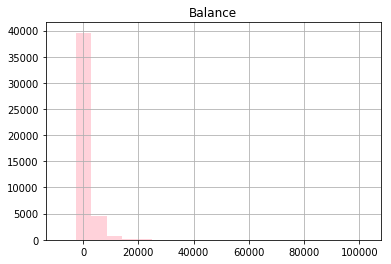

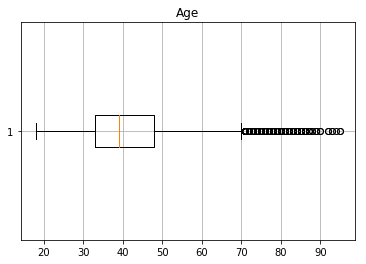

In [8]:
plt.hist(df["balance"], bins=20, color='pink',alpha=0.7)
plt.title("Balance")
plt.grid(True)
plt.show()
plt.boxplot(df["age"],vert = False)
plt.title("Age")
plt.grid(True)
plt.show()

3) Plot separately the distributions of balance values for people with negative outcome and positive outcomes. Are they different? If so, how?

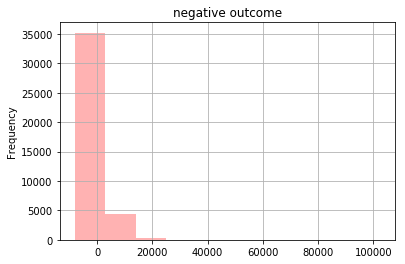

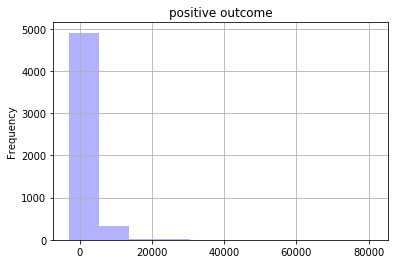

They are different,people with a negative outcome tend to have lower balance than people with positive outcome


In [9]:
distribution = df[(df["outcome"] == "no")]["balance"].plot.hist(bins=10,color='red',alpha=0.3)
plt.title("negative outcome")
plt.grid(True)
plt.show()

distribution = df[(df["outcome"] == "yes")]["balance"].plot.hist(bins=10,color='blue',alpha=0.3)
plt.title("positive outcome")
plt.grid(True)
plt.show()

print("They are different,people with a negative outcome tend to have lower balance than people with positive outcome")

# Q2

## Missing Values

1) Which of the attributes have missing values? How many?

In [10]:
print(df.isnull().sum())
print("only the 'days_from_last_contact' attribute, which has 36954 missing values")

age                               0
job                               0
marital                           0
education                         0
default_credit                    0
balance                           0
housing_loan                      0
personal_loan                     0
contact                           0
day                               0
month                             0
duration                          0
campaign                          0
days_from_last_contact        36954
previous_campaign_contacts        0
previous_campaign_outcome         0
outcome                           0
isContactKnown                    0
dtype: int64
only the 'days_from_last_contact' attribute, which has 36954 missing values


2) Create another dataframe, which doesn't include any people with 'contact' which is 'cellular' or 'telephone'

In [11]:
df2=df.copy()
df2 = df2[(df2.contact!="cellular") & (df2.contact!="telephone")]
df2

,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,False
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,NaN,0,unknown,no,False
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,NaN,0,unknown,no,False
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,NaN,0,unknown,no,False
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,NaN,0,unknown,no,False
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,NaN,0,unknown,no,False


3) Look at the missing values in the 'days_from_last_contact' attribute. What do you think these missing values might represent? Can you find support in the table for your assumption? Hint: The attribute names have a meaning.

In [12]:
#These missing values might represent new useres that haven't been contacted yet.
#As a support we can see in the 'previuos_campaign_contacts' attribute that there are no previous contacts 
#for users that have a missing value in the 'days_from_last_contact' attribute, and that the campaign outcome
#for users like this is 'unknown'.

if ((df[(df.days_from_last_contact.isnull()) & (df.previous_campaign_contacts>0)]).shape[0]==0 &
    (df[(df.days_from_last_contact.isnull()) & (df.previous_campaign_outcome!="unknown")]).shape[0]==0):

    print("No NaN 'days_from_last_contact' user has previous contacts or outcomes!")

No NaN 'days_from_last_contact' user has previous contacts or outcomes!


## Discretization

In class, you've seen three methods of data discretization, and we will focus on two of them - Equal-width (distance) and Equal-depth (frequency).

1) Discretize the balance attribute to 7 intervals using equal-width discretization, and plot the frequency table for them.

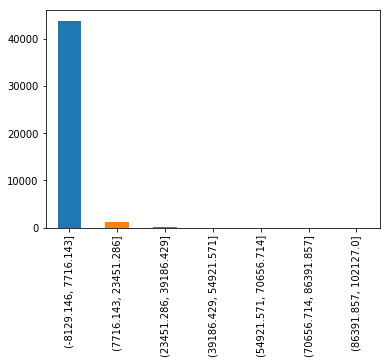

In [13]:
display(pd.cut(df.balance, 7).value_counts().plot(kind='bar'))
plt.show()

2) Discretize the age attribute into 6 intervals using equal-depth discretization, and plot the frequency table for them.

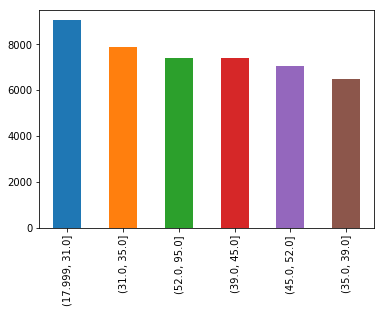

In [14]:
display(pd.qcut(df.age, 6).value_counts().plot(kind='bar'))
plt.show()

3) Propose a way to further discretize the Month column.

If we'd like to discretize the data in an equal-width way, we could just calculate the frequency table of the month column using 'cut' and plot it by the number of months(12), or by 4 to see which quarter of the year is the busiest. If we'd like to discretize the data in an equal-depth form, we can grant each month a numeric value and use 'qcut', so we would be able to order the months into a sequence and calculate quantiles on that sequence.

# Q3

## Correlation

1) Calculate the pearson and spearman correlation between age and balance.

In [16]:
print("pearson:")
display(df[["age", "balance"]].corr()) # pearson 
print("spearman:")
display(df[["age", "balance"]].corr(method="spearman")) #spearman 

pearson:


,age,balance
age,1.000000,0.097783
balance,0.097783,1.000000


spearman:


,age,balance
age,1.00000,0.09638
balance,0.09638,1.00000


2) Calculate the full pearson correlation matrix for all the numeric columns in the data.

In [17]:
display(df.select_dtypes(include=['int64','float64']).corr())

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts
age,1.000000,0.097783,-0.009120,-0.004648,-0.107863,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.108122,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,-0.090095,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.024407,0.001203
days_from_last_contact,-0.107863,-0.108122,-0.090095,-0.024407,1.000000,-0.021885
previous_campaign_contacts,0.001288,0.016674,-0.051710,0.001203,-0.021885,1.000000


## Mutual Information

Calcalate the entropy of each of the attributes in the data. Which has the biggest entropy?

In [19]:
def entropy(labels):
    n_labels = len(labels)

    if n_labels <= 1:
        return 0.0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0.0

    ent = 0.

    # Compute entropy
    for i in probs:
        ent -= i * np.log(i)

    return ent

max_ent = 0
d = {}
for col in df.axes[1]:
    ent = entropy(df[col][df[col].notnull()])
    if (max_ent < ent):
        max_ent = ent
        max_col = col
    d[col] = ent

display(pd.Series(d).to_frame('entropy').sort_values('entropy'))

print     
print ("Attribute with max entropy : ", max_col) #balance
    

,entropy
default_credit,0.090256
outcome,0.360874
personal_loan,0.440045
isContactKnown,0.600336
previous_campaign_outcome,0.649489
housing_loan,0.686898
contact,0.816198
previous_campaign_contacts,0.828597
marital,0.911676
education,1.119365


Attribute with max entropy :  balance


Which attribute has the highest Mutual Information with the 'outcome' attribute?

In [26]:
def mi(x, y):
    sum_mi = 0.0
    x_values, x_counts = np.unique(x, return_counts=True)
    y_values, y_counts = np.unique(y, return_counts=True)
    Px = x_counts/len(x)
    Py = y_counts/len(y)
    for i in range(len(x_values)):
        if Px[i] == 0.:
            continue
        sy = y[x == x_values[i]]
        if len(sy)== 0:
            continue
        pxy = np.array([len(sy[sy==yval])/len(y)  for yval in y_values]) #p(x,y)
        t = pxy[Py>0.]/Py[Py>0.] /Px[i] # log(P(x,y)/(P(x)*P(y))
        sum_mi += sum(pxy[t>0]*np.log( t[t>0]) ) # sum ( P(x,y)* log(P(x,y)/( P(x)*P(y)) )
    return sum_mi

max_mut = 0
d = {}
for col in df.axes[1]:
    if (col != 'outcome'):
        mut = mi(df['outcome'][df['outcome'].notnull()],df[col][df[col].notnull()])
        if (mut > max_mut):
            max_mut = mut
            max_col = col
        d[col] = mut

display(pd.Series(d).to_frame('Mutal information with outcome').sort_values('Mutal information with outcome'))          
print ("Attribute with max Mutal information with outcome : ", max_col)

,Mutal information with outcome
default_credit,0.000294
marital,0.002101
education,0.002598
personal_loan,0.002630
campaign,0.004590
day,0.006092
job,0.008264
housing_loan,0.009654
previous_campaign_contacts,0.012797
age,0.012903


Attribute with max Mutal information with outcome :  days_from_last_contact


# Q4

## Outliers

Does the campaign column in the table have any outliers? Support your claim with a relevant plot.

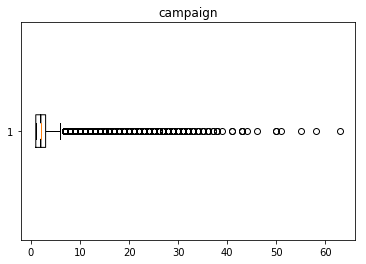

calculate summary statistics:


count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

lower bound: -6.53011920561201
upper bound: 12.057800522105783
We can then identify outliers as those examples that fall outside of the defined lower and upper limits.


840

Percentiles: 25th=1.000, 75th=3.000, IQR=2.000


In [74]:
from numpy import mean
from numpy import std
from numpy import percentile

plt.boxplot(df["campaign"], 'rs',vert=False)
plt.title("campaign")
plt.show()
print("calculate summary statistics:")
data_mean, data_std = mean(df["campaign"].astype(int)), std(df["campaign"].astype(int))
display(df["campaign"].describe())
# identify outliers with standard deviation
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print("lower bound:",lower)
print("upper bound:",upper)
print("We can then identify outliers as those examples that fall outside of the defined lower and upper limits.")
outliers = [x for x in df["campaign"] if x < lower or x > upper]
display(len(outliers))
# calculate interquartile range
q25, q75 = percentile(df["campaign"], 25), percentile(df["campaign"], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

answer: As we can see, there are lots of dots after the right whisker, it means many abnormal values.
The mean value: 2.764, with a of 3.09 std.
840 outliers founded.

## Normalization

Think of an appropriate normalization method and normalize the days_from_last_contact column in the table. Why did you choose this method?

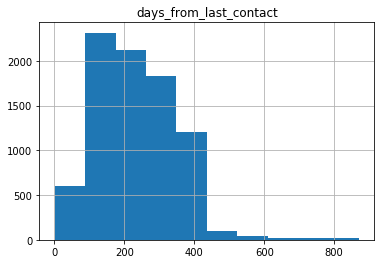

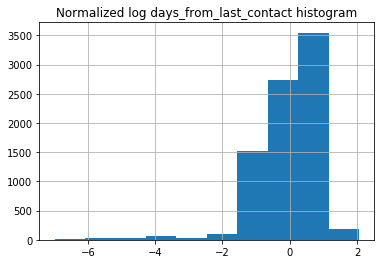

In [98]:
df["days_from_last_contact"].hist(bins=10).set_title("days_from_last_contact")
plt.show()
log_days_from_last_contact = np.log2(df["days_from_last_contact"])
mean = np.mean(log_days_from_last_contact)
std = np.std(log_days_from_last_contact)
log_norm_days_from_last_contact = (log_days_from_last_contact - mean)/std
log_norm_days_from_last_contact.hist(bins=10).set_title("Normalized log days_from_last_contact histogram")
plt.show()

answer: The entropy of days_from_last_contact column is low, so we can use the Z normalization. 
But second observation shows that the data is skewed, so we will use the log normalization before the Z-normalization to get a better normalized distribution.